# Exploratory Data Analysis

In [1]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(infer))
suppressPackageStartupMessages(library(cowplot))
suppressPackageStartupMessages(library(broom))
suppressPackageStartupMessages(library(GGally))

## Data Description (2 or 3 sentences and no more than 1 table)

The [Placement Prediction Dataset](https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset/data) contains data which can be used to predict whether a college student gets placed or not placed in the placement process based on academic and training scores and status. The dataset contains 10000 observations and 12 variables as follows:  

**Numberical Variables:**
- `StudentID`: Unique student identifier (range 1-10000)
- `CGPA`: Cummulative grade point average achieved by each student (10-point scale)
- `Internships`: Number of internships done by each student
- `Projects`: Number of projects done by each student
- `Workshops/Certifications`: Number of online workshops and certifications each student has participated in/received
- `AptitudeTestScores`: Aptitude test scores taken to understand a student's quant and logical thinking (100-point scale)
- `SoftSkillsRating`: Soft skills rating score to evaluate a student's communication skills (5-point scale)
- `SSC_Marks`: Senior Secondary Marks (100-point scale)
- `HSC_Marks`: Higher Secondary Marks (100-point scale)

**Categorical Variables:**
- `ExtracurricularActivities`: Binary (Yes/No) indicating whether each student participates in extracurricular activities or not
- `PlacementTraining`: Binary (Yes/No) indicating whether each student participated in placement training 
- `PlacementStatus`: Binary (Placed/NotPlaced) indicating whether each student was placed or not (response variable)

### Pre-selection of variables

To start, I will drop the `StudentID` variable because it is a student identifier which tells us there is one observation per student. This will not be needed in analysis.

## Question

The question I want to analyze is: How are academic scores (ie. CGPA) and experiential learning (ie. internships, extracurricular activities) associated with a student's placement status (response variable)?  

The primary focus of my question is inference because I am interested in analyzing the relationships between explatory variables and the response variable. 

## Exploratory Data Analysis and Visualization (no more than one plot per student)

### Load and clean data

In [2]:
# load data
data <- read_csv('placementdata.csv', show_col_types = FALSE)
# head(data, 5)

In [3]:
# clean data
data <- data %>% 
    select(-StudentID) %>%
    mutate(across(c(PlacementStatus, ExtracurricularActivities, PlacementTraining), as.factor))
head(data, 5)

CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>
7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


### Data Visualizations

In [4]:
# split CGPA into quartiles
cgpa_quartiles <- data %>% 
    mutate(CGPA_quartiles = cut(CGPA,
                               breaks = quantile(CGPA, probs=c(0, 0.25, 0.50, 0.75, 1), na.rm=TRUE),
                               include.lowest=TRUE,
                               labels=c("Bottom 25%", "25-50%", "50-75%", "Top 25%")))

#cgpa_quartiles %>% count(CGPA_quartiles) #check quartile distribution
#data %>% count(Internships) #check internship distribution

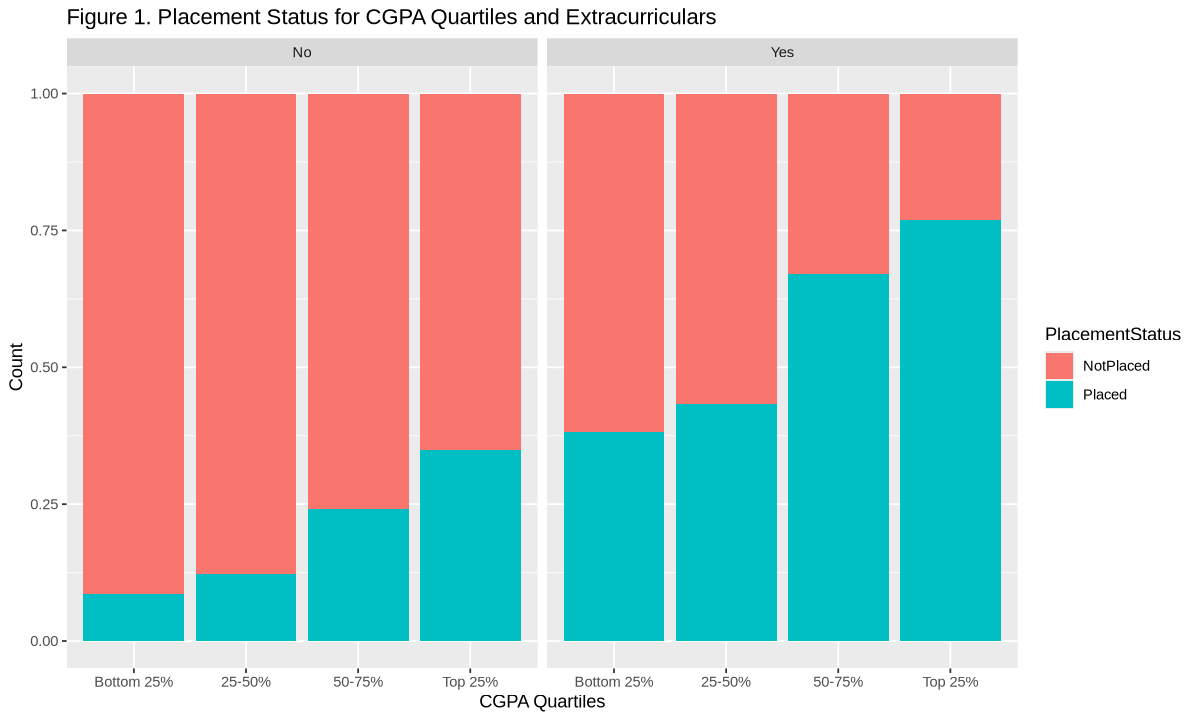

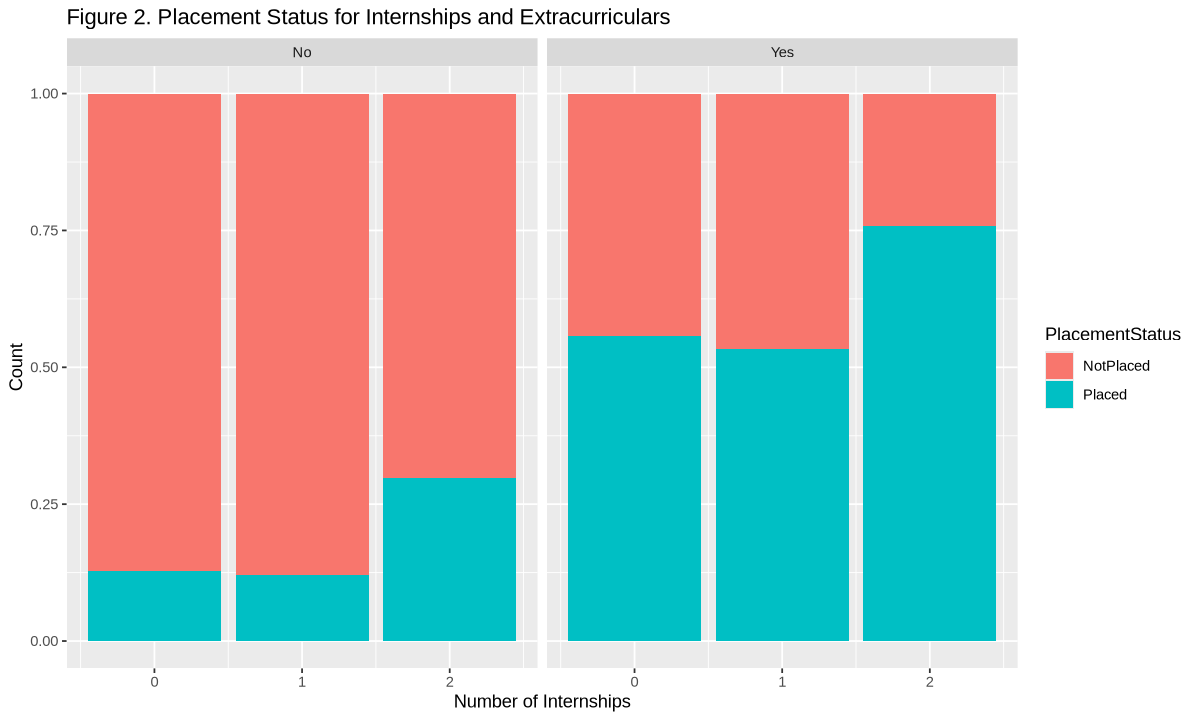

In [5]:
options(repr.plot.width = 10, repr.plot.height = 6)
par(mfrow=c(1,2))
cgpa_quartiles %>% ggplot(aes(x=CGPA_quartiles, fill=PlacementStatus)) +
    geom_bar(position="fill") +
    facet_wrap(~ExtracurricularActivities) +
    labs(title="Figure 1. Placement Status for CGPA Quartiles and Extracurriculars", x="CGPA Quartiles", y="Count")

data %>% ggplot(aes(x=Internships, fill=PlacementStatus)) +
    geom_bar(position="fill") +
    facet_wrap(~ExtracurricularActivities) +
    labs(title="Figure 2. Placement Status for Internships and Extracurriculars", x="Number of Internships", y="Count")

Figure 1 is a stacked bar plot that shows the proportion of students in each CGPA quartile who were placed/not placed in each extracurricular group (yes/no). It provides insights on how CGPA and extracurricular activities are associated with placement status. 

We observe that for students with no extracurricular activities, there's a greater proportion of students who were not placed in all CGPA quartiles. For students with extracurricular activities, a greater proportion of students in higher CGPA quartiles were placed and it was more even for students in low-mid CGPA quartiles. This suggests that students with no extracurricular activities are expected not to be placed regardless of their CGPA while placement status of students with extracurricular activities is associated with CGPA.

Figure 2 is a stacked bar plot that shows the proportion of students who did 0, 1, or 2 internships who were placed or not placed in each extracurricular group (yes/no). It provides insights on how the number of internships a student does and extracurricular activities are associated with placement status. 

We observe that for students with no extracurricular activities, there's a higher proportion of students who were not placed regardless of how many internships they did. For students with extracurricular activities, a higher proportion of students were placed for students, but the proportions for each number of internships are relatively similar. This suggests that the number of interships a student has done is not or weakly associated with placement status.

Some concerns so far are that the sample size of students who did 0, 1, and 2 internships is uneven which may distort the proportion of placement status.